In [17]:
# Importação da biblioteca Pandas
import pandas as pd

# Criação dos dados
data ={
    'Eletronicos': [1,2,4,5,6,10,9,3,1,8],
    'Preço_Reparo': ['1220.10','1100.20','800.90','1500.0','1100.99','800.61','700.00','599.99','599.99','1100.20'],
    'Categoria': ['Tv','SmartPhone','PS5','PS5','XBox','Tv','SmartPhone','XBox','SmartPhone','Tv'],
    'Data_do_Reparo': ['2025-01-02','2025-01-02','2025-01-02','2025-01-02','2025-01-08','2025-01-09','2025-01-15',
                       '2025-01-17', '2025-02-02', '2025-02-03'],
    'Consertado': [False, True, False, True, True, False, False, False, True, True]

}

#Transformação dos dados em DataFrame
df = pd.DataFrame(data)

df

,Eletronicos,Preço_Reparo,Categoria,Data_do_Reparo,Consertado
0,1,1220.10,Tv,2025-01-02,False
1,2,1100.20,SmartPhone,2025-01-02,True
2,4,800.90,PS5,2025-01-02,False
3,5,1500.0,PS5,2025-01-02,True
4,6,1100.99,XBox,2025-01-08,True
5,10,800.61,Tv,2025-01-09,False
6,9,700.00,SmartPhone,2025-01-15,False
7,3,599.99,XBox,2025-01-17,False
8,1,599.99,SmartPhone,2025-02-02,True
9,8,1100.20,Tv,2025-02-03,True


In [18]:
#Data Frame com o valor de todos os equipamentos consertados e não consertados
df['Valor Total'] = df['Eletronicos'] * df['Preço_Reparo'].astype(float)
df_consertoTotal = df.groupby('Categoria').agg({'Valor Total': 'sum'}, {'Preço_Reparo': 'sum'})
df_consertoTotal

,Valor Total
Categoria,
PS5,10703.60
SmartPhone,9100.39
Tv,18027.80
XBox,8405.91


In [34]:
#iltrando os eletrônicos consertados (Concertado == True)
#eletronicos_True = df_dados[df_dados['Consertado'] == True]

# Calculando o valor total dos consertos == True
df['Valor_Total_T'] = df['Eletronicos'] * df.loc[df['Consertado'] == True ,'Preço_Reparo'].astype(float)
#eletronicos_consertados['Preço_Reparo'].sum()

dados_agrupadosTrue = df.groupby('Categoria')['Valor_Total_T'].sum().reset_index()
dados_agrupadosTrue

,Categoria,Valor_Total_T
0,PS5,7500.00
1,SmartPhone,2800.39
2,Tv,8801.60
3,XBox,6605.94


In [33]:
# Calculando o valor total dos consertos == True
df['Valor_Total_F'] = df['Eletronicos'] * df.loc[df['Consertado'] == False, 'Preço_Reparo'].astype(float)


dados_agrupadosFalse = df.groupby('Categoria')['Valor_Total_F'].sum().reset_index()
dados_agrupadosFalse

,Categoria,Valor_Total_F
0,PS5,3203.60
1,SmartPhone,6300.00
2,Tv,9226.20
3,XBox,1799.97


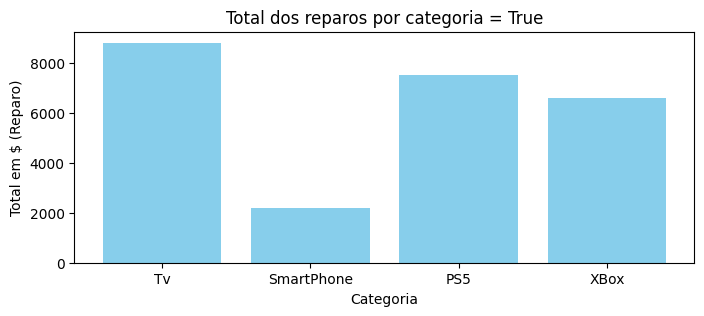

In [36]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# Fazendo gráficos por categoria
plt.figure(figsize=(8,3)) # Determinando o tamanho da figura (imagem)
plt.bar(df['Categoria'], df['Valor_Total_T'],color= 'skyblue') # Determinando o tipo de gráfico e os campos
plt.xlabel('Categoria') # Nomeando o eixo X do Gráfico
plt.ylabel('Total em $ (Reparo)') # Nomeando o eixo Y do Gráfico
plt.title('Total dos reparos por categoria = True') # Nomeando o titulo do grafico
plt.show() # Exibindo o gráfico

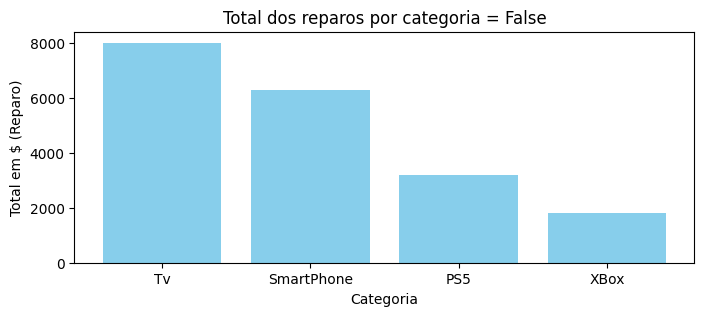

In [37]:
# Importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# Fazendo gráficos por categoria
plt.figure(figsize=(8,3)) # Determinando o tamanho da figura (imagem)
plt.bar(df['Categoria'], df['Valor_Total_F'],color= 'skyblue') # Determinando o tipo de gráfico e os campos
plt.xlabel('Categoria') # Nomeando o eixo X do Gráfico
plt.ylabel('Total em $ (Reparo)') # Nomeando o eixo Y do Gráfico
plt.title('Total dos reparos por categoria = False') # Nomeando o titulo do grafico
plt.show() # Exibindo o gráfico